In [15]:
import numpy as np
dataset_filename = "affinity_dataset.txt"
X = np.loadtxt(dataset_filename)

In [16]:
from collections import defaultdict
valid_rules = defaultdict(int)
invalid_rules = defaultdict(int)
num_occurances = defaultdict(int)

for sample in X:
    for premise in range(4):
        if sample[premise] == 0: continue
        num_occurances[premise] += 1
        for conclusion in range(4):
            if premise == conclusion: continue
            if sample[conclusion] == 1:
                valid_rules[(premise, conclusion)] += 1
            else:
                invalid_rules[(premise, conclusion)] += 1

support = valid_rules
confidence = defaultdict(int)
for premise, conclusion in valid_rules:
    rule = (premise, conclusion)
    confidence[rule] = valid_rules[rule] / num_occurances[premise]

def print_rule(premise, conclusion,
              support, confidence, features):
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: if a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    

In [17]:
premise = 1
conclusion = 3
features = ['bread','milk','cheese','apple','banana']
print_rule(premise, conclusion, support, confidence, features)

Rule: if a person buys milk they will also buy apple
 - Support: 9
 - Confidence: 0.196


In [18]:
from operator import itemgetter
sorted_support = sorted(support.items(), key=itemgetter(1), reverse=True)

for index in range(5):
    print("Rule #{0}".format(index + 1))
    premise, conclusion = sorted_support[index][0]
    print_rule(premise, conclusion, support, confidence, features)


Rule #1
Rule: if a person buys cheese they will also buy apple
 - Support: 25
 - Confidence: 0.610
Rule #2
Rule: if a person buys apple they will also buy cheese
 - Support: 25
 - Confidence: 0.694
Rule #3
Rule: if a person buys bread they will also buy milk
 - Support: 14
 - Confidence: 0.519
Rule #4
Rule: if a person buys milk they will also buy bread
 - Support: 14
 - Confidence: 0.304
Rule #5
Rule: if a person buys milk they will also buy apple
 - Support: 9
 - Confidence: 0.196


In [19]:
sorted_confidence = sorted(confidence.items(), key=itemgetter(1),  reverse=True) 
for index in range(5):
    print("Rule #{0}".format(index + 1))
    premise, conclusion = sorted_confidence[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: if a person buys apple they will also buy cheese
 - Support: 25
 - Confidence: 0.694
Rule #2
Rule: if a person buys cheese they will also buy apple
 - Support: 25
 - Confidence: 0.610
Rule #3
Rule: if a person buys bread they will also buy milk
 - Support: 14
 - Confidence: 0.519
Rule #4
Rule: if a person buys milk they will also buy bread
 - Support: 14
 - Confidence: 0.304
Rule #5
Rule: if a person buys apple they will also buy milk
 - Support: 9
 - Confidence: 0.250


<IPython.core.display.Javascript object>


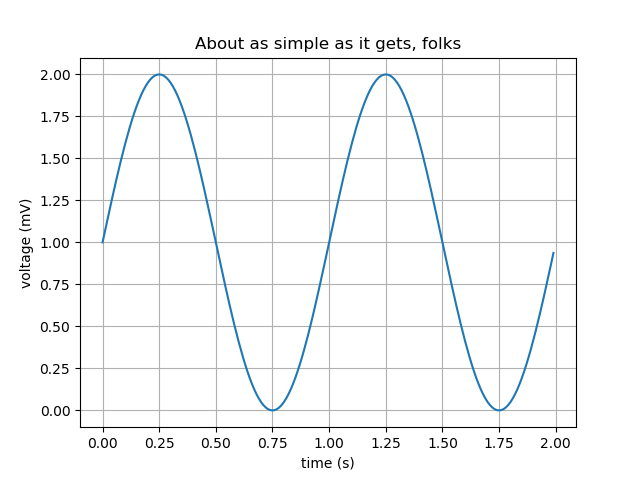

In [10]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()